In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from matplotlib import rcParams
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
rcParams['text.usetex']         = True
rcParams['font.family']         = 'sans-serif'
rcParams['font.sans-serif']     = ['Helvetica']

In [2]:
f_s = '(x**3 - x + 1)*sin(x)'
f = sp.lambdify(('x'),f_s,'numpy')
a = -0.5
b = 1

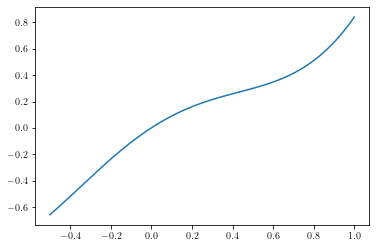

In [3]:
x = np.linspace(a,b,int(100*abs(a-b)))
plt.plot(x,f(x))
plt.show()

In [4]:
def bisect_root(f,a,b,M=1e5,T=1e-10,E=1e-10):
    assert f(a)*f(b) < 0,'Not guranteed that zero exists -- try another interval'
    
    for i in range(int(M)):
        c = (a+b)/2
        
        if abs(a-b) < T or abs(f(c)) < E:
            break
        
        if f(c)*f(a) < 0:
            b = c
        elif f(c)*f(b) < 0:
            a = c
        
    return c

In [5]:
root = bisect_root(f,a,b)
print(root)
print(f(root))

5.820766091346741e-11
5.8207660910079275e-11


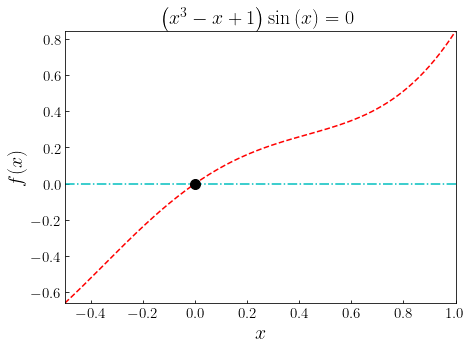

In [9]:
x = np.linspace(a,b,int(100*abs(a-b)))

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5))

ax.plot(x,f(x),'r--')
ax.axhline(0,color='c',linestyle='-.')
ax.plot(root,f(root),'k.',markersize=20)

ax.set_ylabel(r'$f(x)$',size=20)
ax.set_xlabel(r'$x$',size=20)
ax.set_title(r'$%s = 0$'%sp.latex(sp.parse_expr(f_s)),fontsize=20)
ax.set_xlim(a,b)
ax.set_ylim(f(a),f(b))
ax.tick_params(axis='both',which='major',labelsize=15,direction='in')

plt.show()